In [ ]:
# This model is essentially a "hello world" type thing. I am using the Book in TinyML (by Warden et al)
# To explore how to deploy Machine Learning models to tiny machines (Arduino Nano Sense in my case).
# I think this is gonna be pretty sweet!
# Using google collab, as this needs to be updated and some models may be complex!

# -Kieran

In [ ]:
! pip install tensorflow==2.4.0rc0

     |████████████████████████████████| 394.7MB 39kB/s 
     |████████████████████████████████| 14.5MB 330kB/s 
     |████████████████████████████████| 1.3MB 46.1MB/s 
     |████████████████████████████████| 3.8MB 41.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4
  Found existing installation: grpcio 1.34.0
    Uninstalling grpcio-1.34.0:
      Successfully uninstalled grpcio-1.34.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
# Imports

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
print(tf.__version__)

2.3.0


In [ ]:
samples = 10000

# Generate a uniformly distributed set of random numbers in the range from # 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=samples)

In [ ]:
# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

In [ ]:
# Calculate the corresponding  values
y_values = np.sin(x_values)*np.cos(x_values)

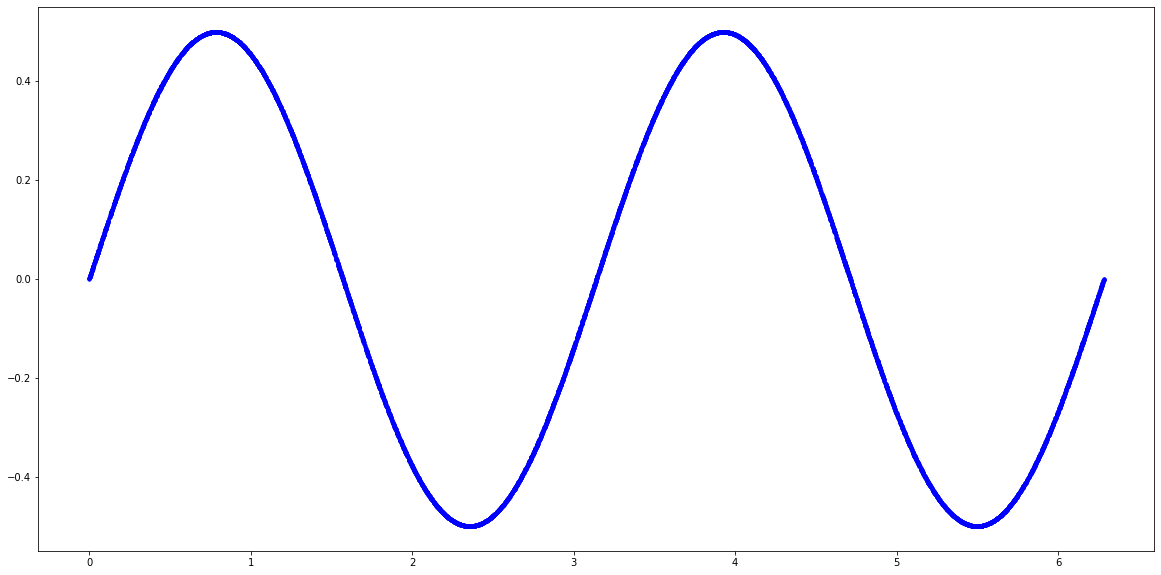

In [ ]:
# Plot 
plt.figure(figsize=(20,10))
plt.plot(x_values, y_values, 'b.') 
plt.show()

In [ ]:
 # Add some noise
y_values += 0.2 * np.random.randn(*y_values.shape)

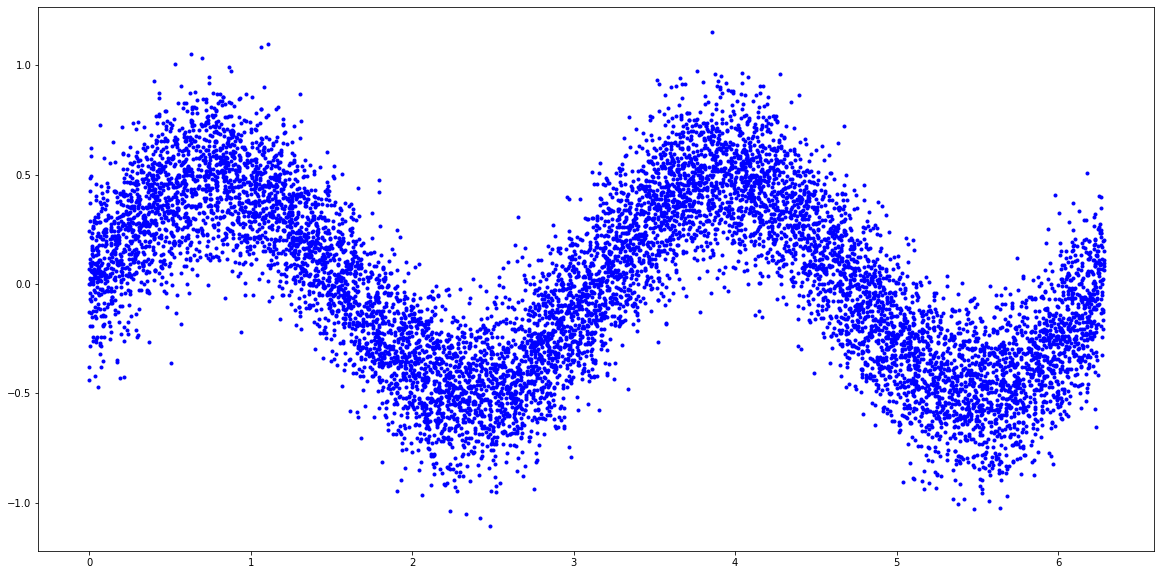

In [ ]:
# Plot 
plt.figure(figsize=(20,10))
plt.plot(x_values, y_values, 'b.') 
plt.show()

In [ ]:

# 60% of our data for training and 20% for testing. 20% # will be used for validation.
train_split = int(0.6 * samples)
test_split = int(0.2 * samples + train_split)
 
x_train, x_validate, x_test = np.split(x_values, [train_split, test_split]) 
y_train, y_validate, y_test = np.split(y_values, [train_split, test_split])

In [ ]:
x_train.shape

(6000,)

In [ ]:
x_validate.shape

(2000,)

In [ ]:
x_test.shape

(2000,)

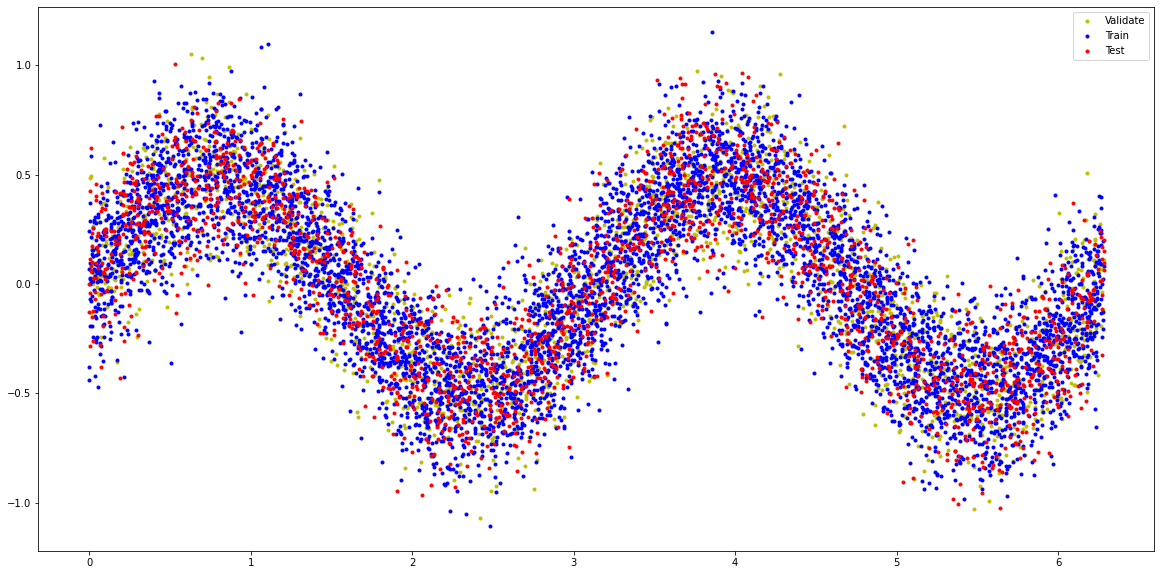

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test") 
plt.legend()
plt.show()


In [ ]:
# Making model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

model_1 = tf.keras.Sequential()
model_1.add(layers.Dense(8, activation='relu', input_shape=(1,)))
model_1.add(layers.Dense(1))
model_1.compile(optimizer='adam', loss='mse', metrics=['mae']) 
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting model

history_1 = model_1.fit(x_train, y_train, epochs=100, batch_size = 8, validation_data=(x_validate, y_validate))

Epoch 1/100
750/750 [==============================] - 1s 1ms/step - loss: 0.1474 - mae: 0.3175 - val_loss: 0.1449 - val_mae: 0.3102
Epoch 2/100
750/750 [==============================] - 1s 943us/step - loss: 0.1434 - mae: 0.3119 - val_loss: 0.1407 - val_mae: 0.3069
Epoch 3/100
750/750 [==============================] - 1s 946us/step - loss: 0.1434 - mae: 0.3115 - val_loss: 0.1406 - val_mae: 0.3077
Epoch 4/100
750/750 [==============================] - 1s 935us/step - loss: 0.1435 - mae: 0.3119 - val_loss: 0.1405 - val_mae: 0.3070
Epoch 5/100
750/750 [==============================] - 1s 974us/step - loss: 0.1434 - mae: 0.3120 - val_loss: 0.1420 - val_mae: 0.3077
Epoch 6/100
750/750 [==============================] - 1s 908us/step - loss: 0.1432 - mae: 0.3120 - val_loss: 0.1416 - val_mae: 0.3072
Epoch 7/100
750/750 [==============================] - 1s 918us/step - loss: 0.1432 - mae: 0.3116 - val_loss: 0.1409 - val_mae: 0.3080
Epoch 8/100
750/750 [==============================] - 1s

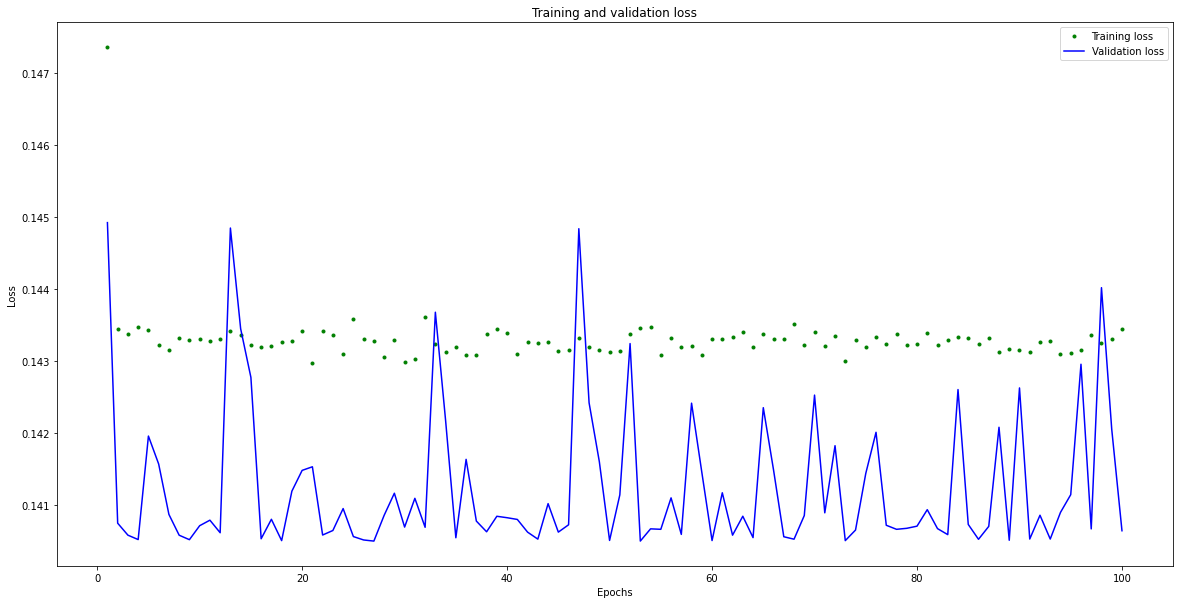

In [ ]:
# Observing losses - model 1

loss = history_1.history['loss'] 
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

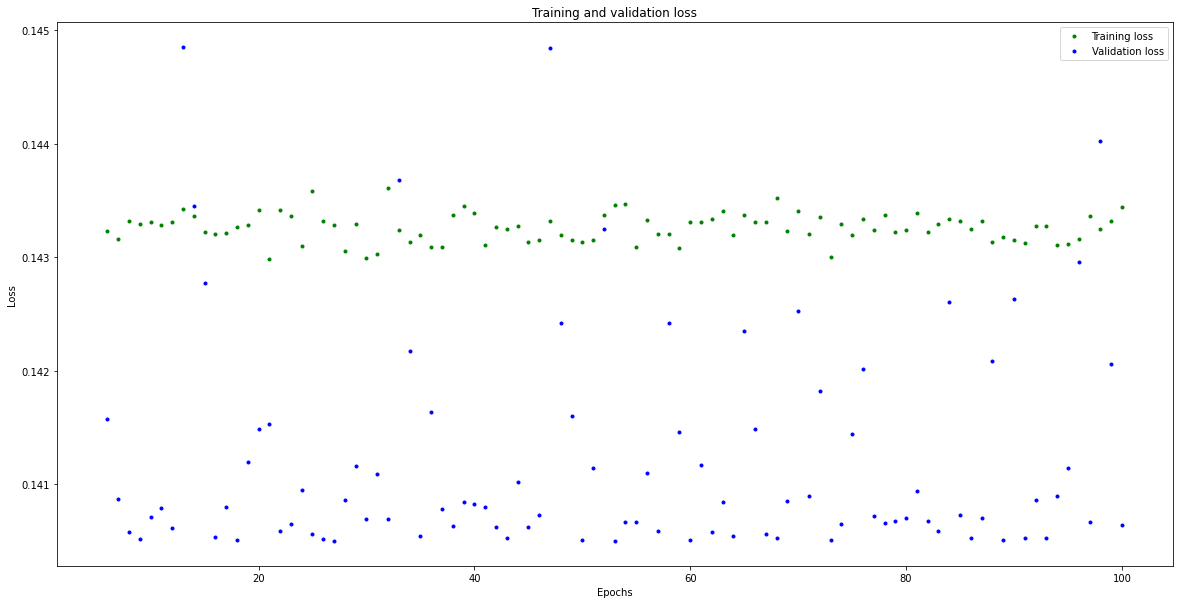

In [ ]:
 # Excluding the first few epochs 
SKIP = 5
plt.figure(figsize=(20,10))
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

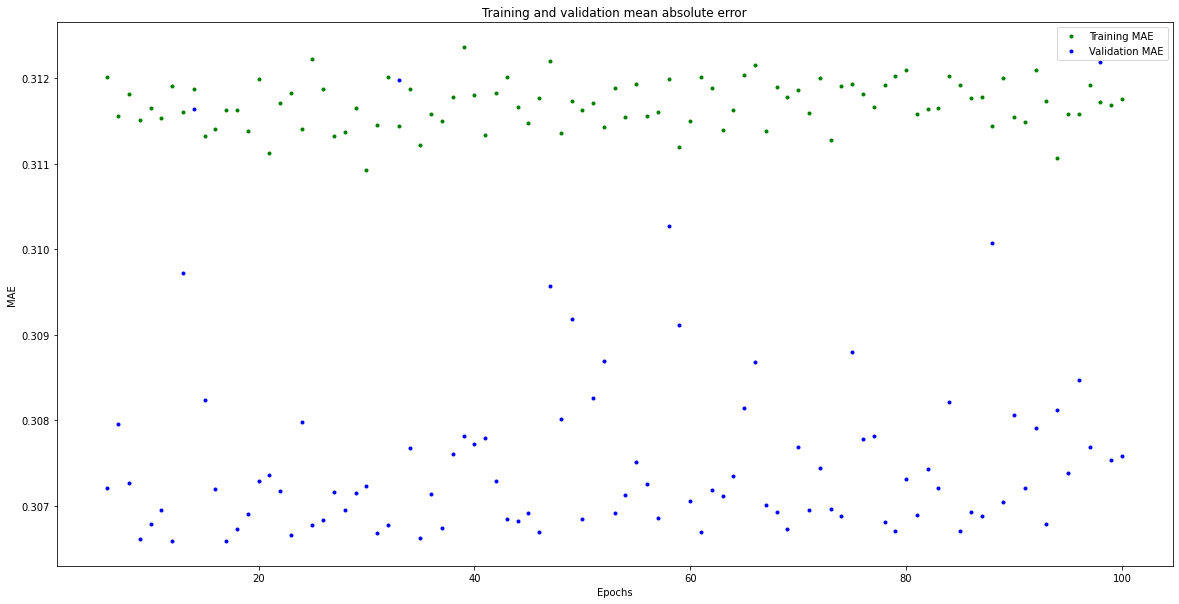

In [ ]:
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.figure(figsize=(20,10))
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE') 
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error') 
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

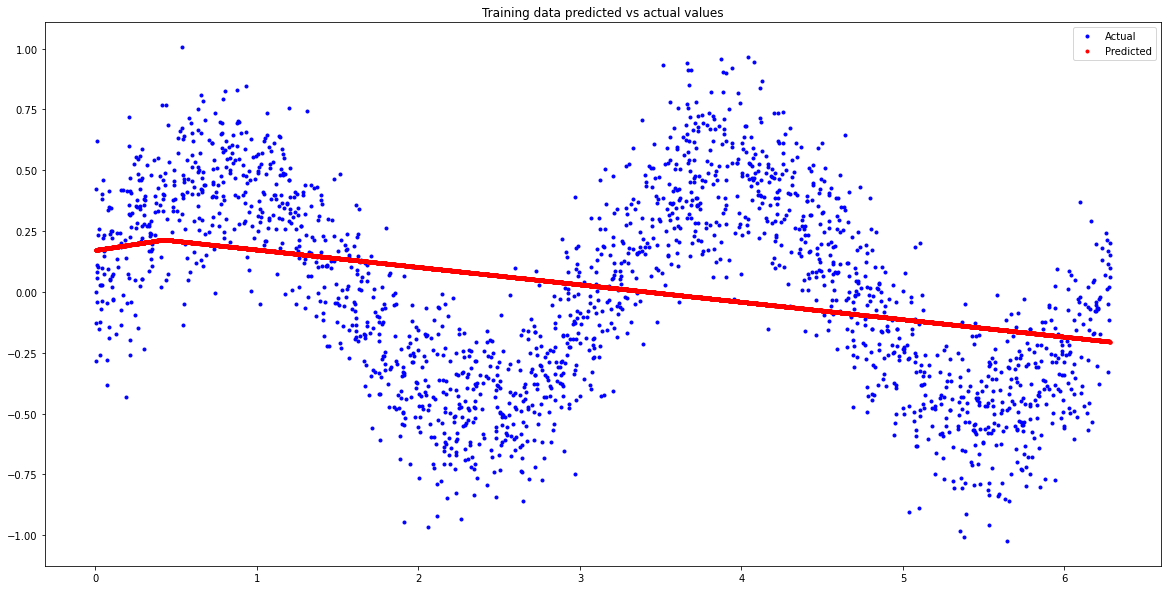

In [ ]:
# Making and plotting predicitions

predictions = model_1.predict(x_train)
# Plot the predictions along with the test data
plt.figure(figsize=(20,10))
plt.title('Training data predicted vs actual values') 
plt.plot(x_test, y_test, 'b.', label='Actual') 
plt.plot(x_train, predictions, 'r.', label='Predicted') 
plt.legend()
plt.show()

In [ ]:
# Imporving model -> model 2

model_2 = tf.keras.Sequential()
model_2.add(layers.Dense(32, activation='relu', input_shape=(1,)))
model_2.add(layers.Dense(32, activation='relu'))
model_2.add(layers.Dense(1))

earlystop_callback = EarlyStopping(monitor='val_mae', patience=20, mode = 'min') # Adding early stopping
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # Show a summary of the model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_2 = model_2.fit(x_train, y_train, 
                        epochs=500, batch_size=16, 
                        validation_data=(x_validate, y_validate),
                        callbacks=[earlystop_callback])

Epoch 1/500
375/375 [==============================] - 1s 1ms/step - loss: 0.1442 - mae: 0.3137 - val_loss: 0.1395 - val_mae: 0.3020
Epoch 2/500
375/375 [==============================] - 0s 1ms/step - loss: 0.1350 - mae: 0.2997 - val_loss: 0.1288 - val_mae: 0.2925
Epoch 3/500
375/375 [==============================] - 0s 1ms/step - loss: 0.1288 - mae: 0.2909 - val_loss: 0.1238 - val_mae: 0.2823
Epoch 4/500
375/375 [==============================] - 0s 1ms/step - loss: 0.1265 - mae: 0.2870 - val_loss: 0.1271 - val_mae: 0.2805
Epoch 5/500
375/375 [==============================] - 0s 1ms/step - loss: 0.1258 - mae: 0.2856 - val_loss: 0.1222 - val_mae: 0.2808
Epoch 6/500
375/375 [==============================] - 0s 1ms/step - loss: 0.1253 - mae: 0.2841 - val_loss: 0.1234 - val_mae: 0.2846
Epoch 7/500
375/375 [==============================] - 0s 1ms/step - loss: 0.1237 - mae: 0.2829 - val_loss: 0.1229 - val_mae: 0.2767
Epoch 8/500
375/375 [==============================] - 0s 1ms/step - 

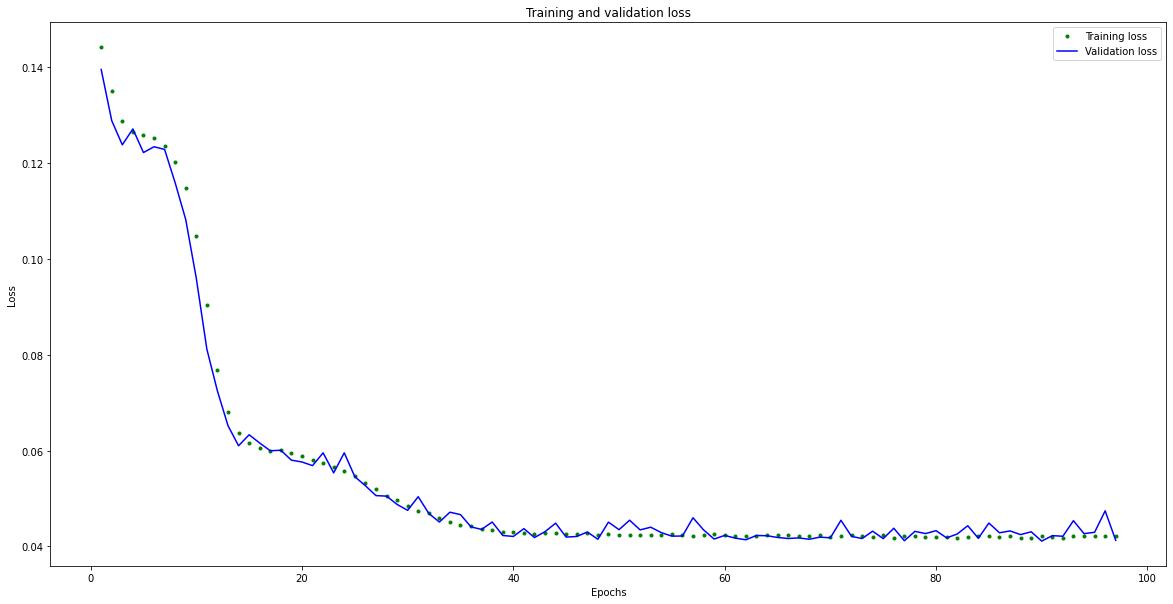

In [ ]:
# Observing losses - model 2

loss = history_2.history['loss'] 
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

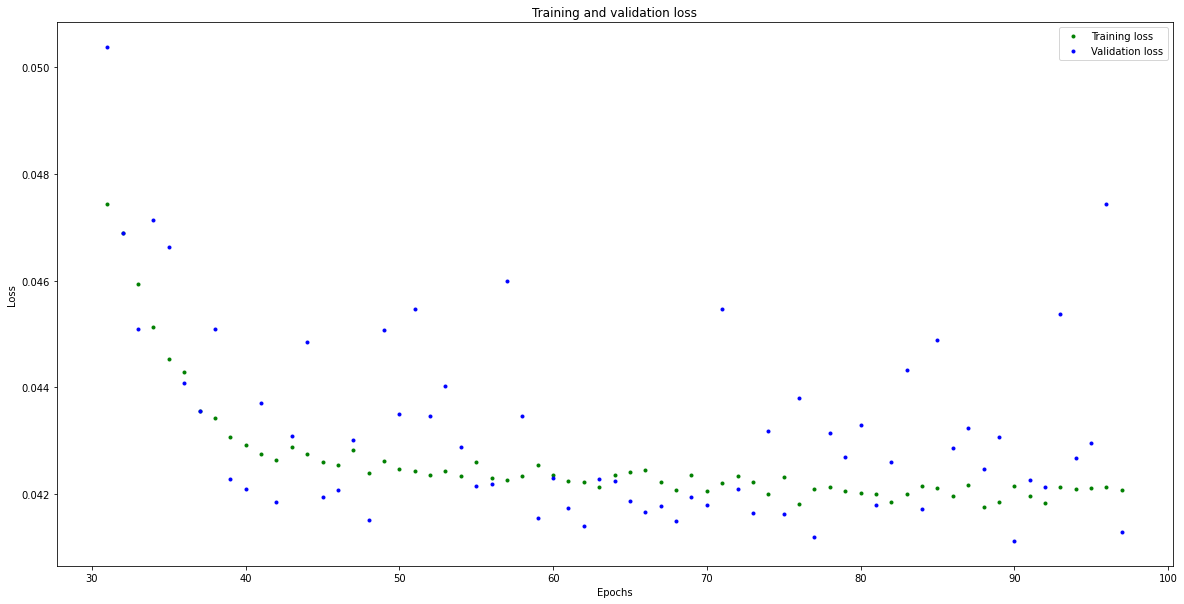

In [ ]:
 # Excluding the first few epochs 
SKIP = 30
plt.figure(figsize=(20,10))
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

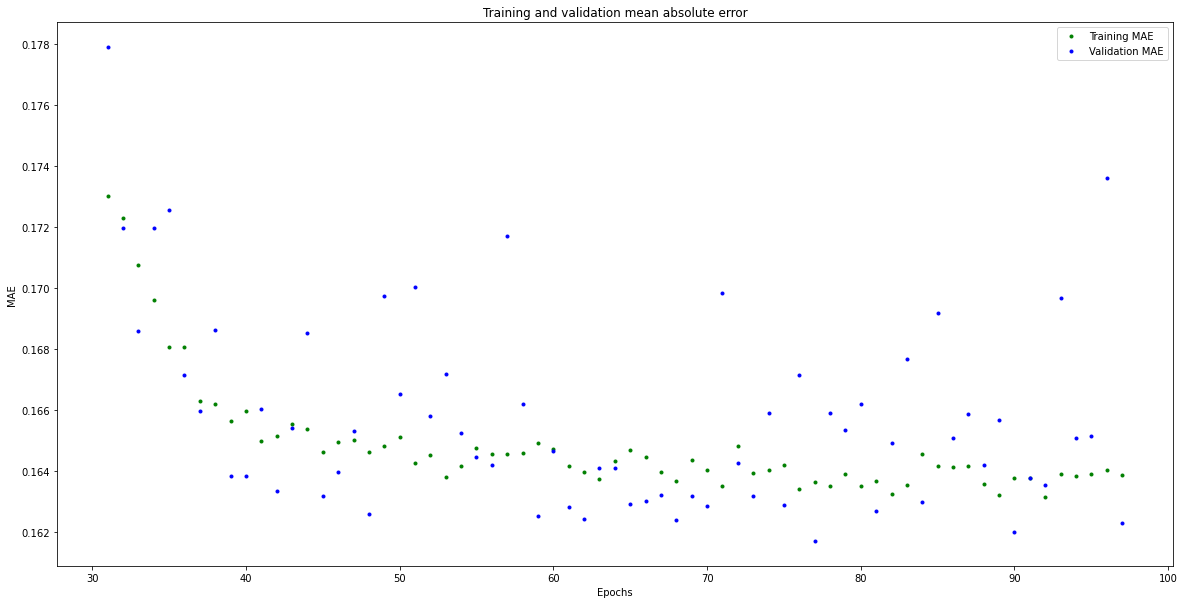

In [ ]:
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']
plt.figure(figsize=(20,10))
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE') 
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error') 
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

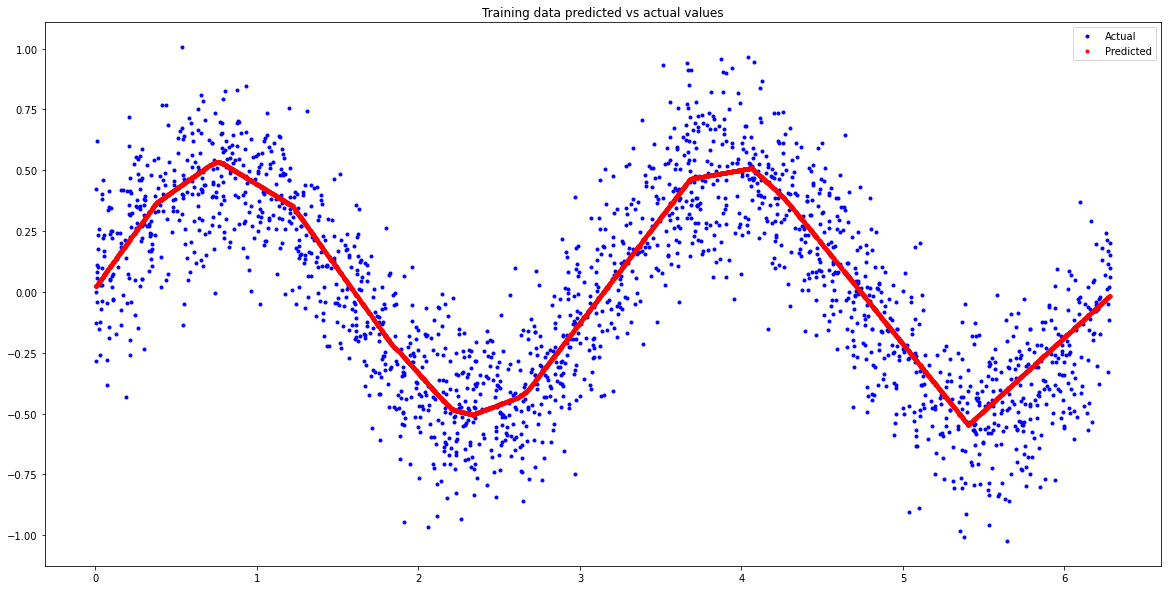

In [ ]:
# Making and plotting predicitions

predictions = model_2.predict(x_train)
# Plot the predictions along with the test data
plt.figure(figsize=(20,10))
plt.title('Training data predicted vs actual values') 
plt.plot(x_test, y_test, 'b.', label='Actual') 
plt.plot(x_train, predictions, 'r.', label='Predicted') 
plt.legend()
plt.show()

In [ ]:
# Imporving model -> model 3

model_3 = tf.keras.Sequential()
model_3.add(layers.Dense(64, activation='relu', input_shape=(1,)))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(1))

earlystop_callback = EarlyStopping(monitor='val_mae', patience=20, mode = 'min') # Adding early stopping
model_3.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # Show a summary of the model
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 8,513
Trainable params: 8,513
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_3 = model_3.fit(x_train, y_train, 
                        epochs=500, batch_size=16, 
                        validation_data=(x_validate, y_validate),
                        callbacks=[earlystop_callback])

Epoch 1/500
375/375 [==============================] - 1s 1ms/step - loss: 0.1368 - mae: 0.3022 - val_loss: 0.1202 - val_mae: 0.2734
Epoch 2/500
375/375 [==============================] - 0s 1ms/step - loss: 0.1032 - mae: 0.2572 - val_loss: 0.0872 - val_mae: 0.2361
Epoch 3/500
375/375 [==============================] - 0s 1ms/step - loss: 0.0709 - mae: 0.2123 - val_loss: 0.0564 - val_mae: 0.1874
Epoch 4/500
375/375 [==============================] - 0s 1ms/step - loss: 0.0602 - mae: 0.1943 - val_loss: 0.0558 - val_mae: 0.1881
Epoch 5/500
375/375 [==============================] - 0s 1ms/step - loss: 0.0565 - mae: 0.1884 - val_loss: 0.0538 - val_mae: 0.1846
Epoch 6/500
375/375 [==============================] - 0s 1ms/step - loss: 0.0541 - mae: 0.1845 - val_loss: 0.0561 - val_mae: 0.1886
Epoch 7/500
375/375 [==============================] - 0s 1ms/step - loss: 0.0516 - mae: 0.1801 - val_loss: 0.0484 - val_mae: 0.1746
Epoch 8/500
375/375 [==============================] - 0s 1ms/step - 

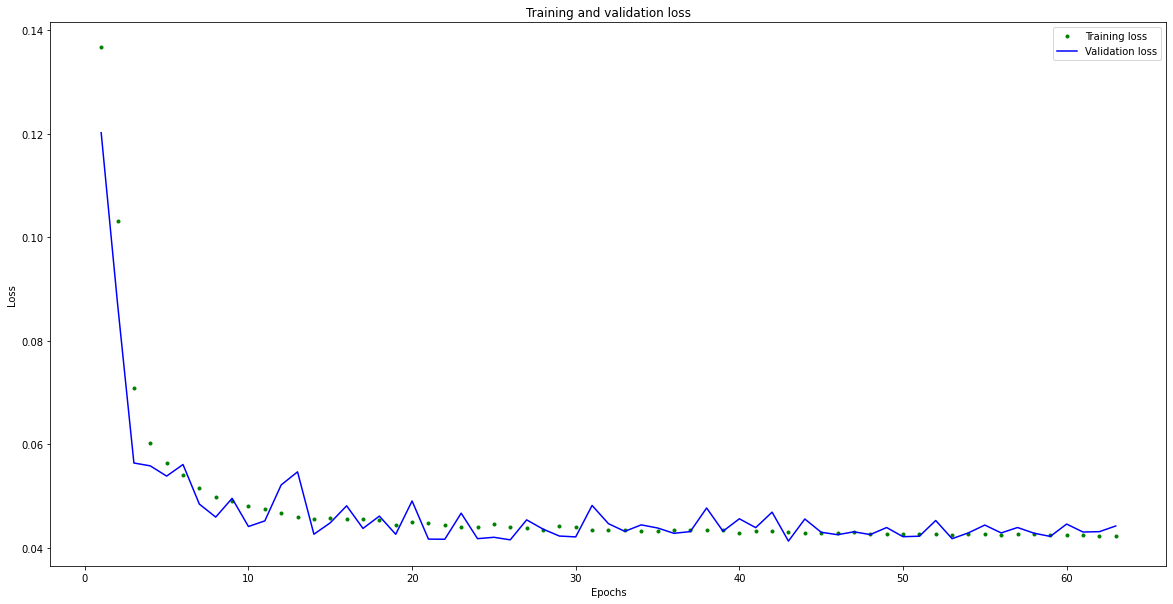

In [ ]:
# Observing losses - model 3

loss = history_3.history['loss'] 
val_loss = history_3.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

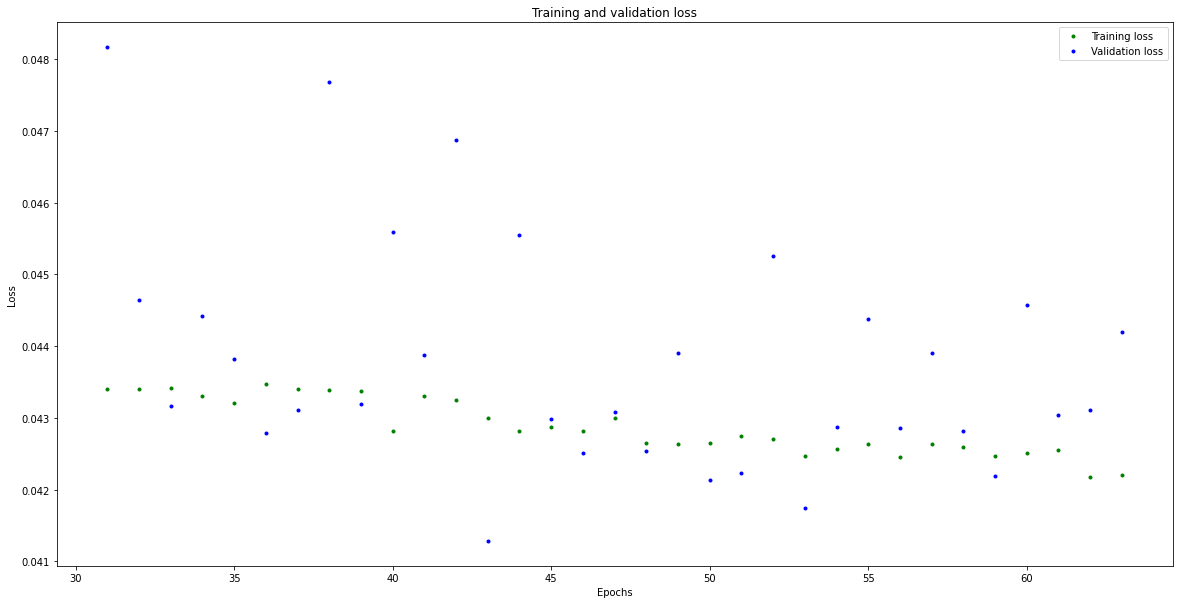

In [ ]:
 # Excluding the first few epochs 
SKIP = 30
plt.figure(figsize=(20,10))
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

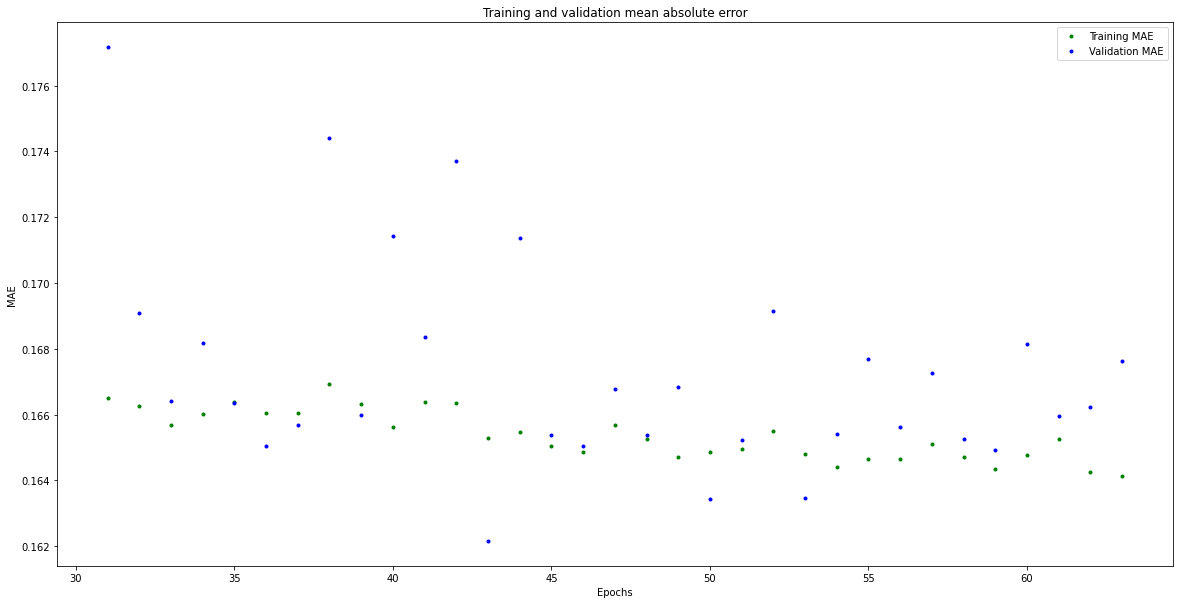

In [ ]:
mae = history_3.history['mae']
val_mae = history_3.history['val_mae']
plt.figure(figsize=(20,10))
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE') 
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error') 
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

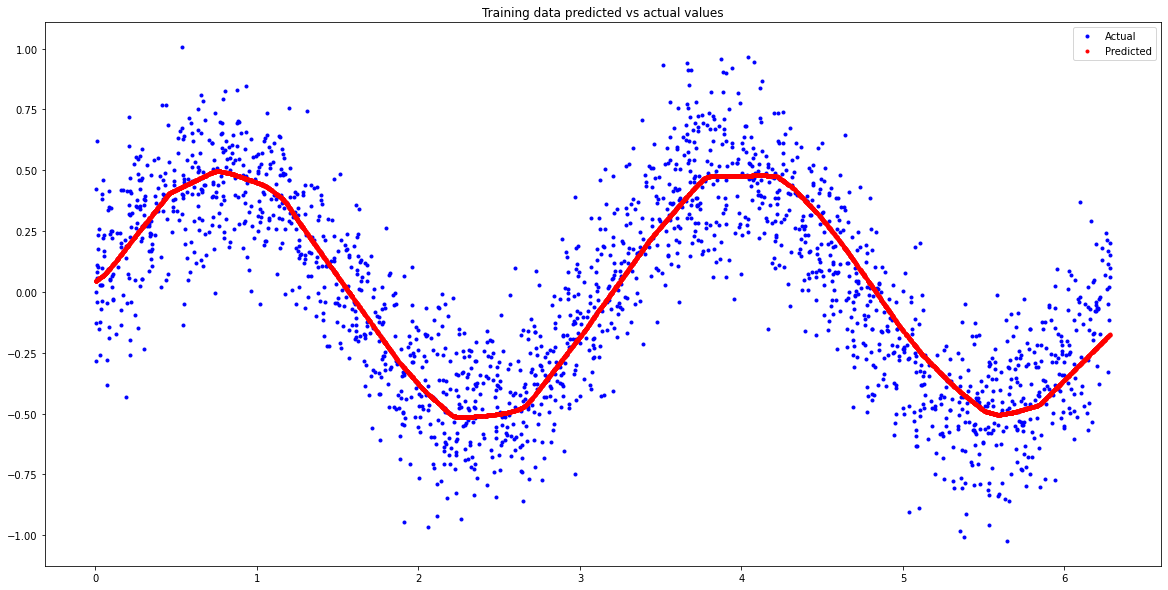

In [ ]:
# Making and plotting predicitions

predictions = model_3.predict(x_train)
# Plot the predictions along with the test data
plt.figure(figsize=(20,10))
plt.title('Training data predicted vs actual values') 
plt.plot(x_test, y_test, 'b.', label='Actual') 
plt.plot(x_train, predictions, 'r.', label='Predicted') 
plt.legend()
plt.show()

In [ ]:
# Model has been imporved substantially!

In [ ]:
# Now getting directories for saving stuff

# Define paths to model files
import os
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

In [ ]:

# Save the model to disk
model_3.save(MODEL_TF)



INFO:tensorflow:Assets written to: models/model/assets


INFO:tensorflow:Assets written to: models/model/assets


In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
model_no_quant_tflite = converter.convert()

# Save the model to disk
open(MODEL_NO_QUANT_TFLITE, "wb").write(model_no_quant_tflite)


36312

In [ ]:
# Convert the model to the TensorFlow Lite format with quantization

# Need to add astype('float32'), otherwise the below wont work!
def representative_dataset():
  for i in range(500):
    yield([x_train[i].reshape(1, 1).astype('float32')])
# Set the optimization flag.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Enforce integer only quantization
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
# Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset
model_tflite = converter.convert()

# Save the model to disk
open(MODEL_TFLITE, "wb").write(model_tflite)


12160

In [ ]:
# Define the predict (for predictions) and evaluate (for loss) functions for TFLite models.
# Note: These are already included in a TF model, but not in a TFLite model!!

def predict_tflite(tflite_model, x_test):
  # Prepare the test data
  x_test_ = x_test.copy()
  x_test_ = x_test_.reshape((x_test.size, 1))
  x_test_ = x_test_.astype(np.float32)

  # Initialize the TFLite interpreter
  interpreter = tf.lite.Interpreter(model_content=tflite_model)
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  # If required, quantize the input layer (from float to integer)
  input_scale, input_zero_point = input_details["quantization"]
  if (input_scale, input_zero_point) != (0.0, 0):
    x_test_ = x_test_ / input_scale + input_zero_point
    x_test_ = x_test_.astype(input_details["dtype"])
  
  # Invoke the interpreter
  y_pred = np.empty(x_test_.size, dtype=output_details["dtype"])
  for i in range(len(x_test_)):
    interpreter.set_tensor(input_details["index"], [x_test_[i]])
    interpreter.invoke()
    y_pred[i] = interpreter.get_tensor(output_details["index"])[0]
  
  # If required, dequantized the output layer (from integer to float)
  output_scale, output_zero_point = output_details["quantization"]
  if (output_scale, output_zero_point) != (0.0, 0):
    y_pred = y_pred.astype(np.float32)
    y_pred = (y_pred - output_zero_point) * output_scale

  return y_pred

def evaluate_tflite(tflite_model, x_test, y_true):
  global model
  y_pred = predict_tflite(tflite_model, x_test)
  loss_function = tf.keras.losses.get(model.loss)
  loss = loss_function(y_true, y_pred).numpy()
  return loss

In [ ]:
# Calculate predictions
y_test_pred_tf = model_3.predict(x_test)
y_test_pred_no_quant_tflite = predict_tflite(model_no_quant_tflite, x_test)
y_test_pred_tflite = predict_tflite(model_tflite, x_test)

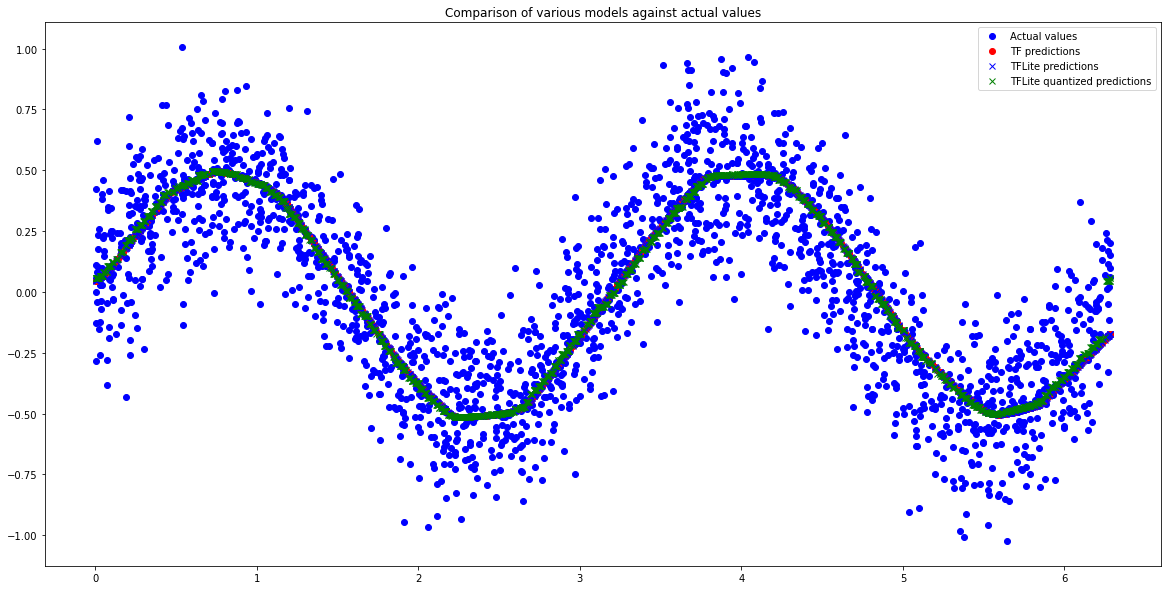

In [ ]:
# Compare predictions
plt.figure(figsize=(20,10))
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual values')
plt.plot(x_test, y_test_pred_tf, 'ro', label='TF predictions')
plt.plot(x_test, y_test_pred_no_quant_tflite, 'bx', label='TFLite predictions')
plt.plot(x_test, y_test_pred_tflite, 'gx', label='TFLite quantized predictions')
plt.legend()
plt.show()

In [ ]:
# Calculate loss

model = model_3 # Setting generic model equal to most accurate model!
loss_tf, _ = model.evaluate(x_test, y_test, verbose=0)
loss_no_quant_tflite = evaluate_tflite(model_no_quant_tflite, x_test, y_test)
loss_tflite = evaluate_tflite(model_tflite, x_test, y_test)

In [ ]:
# Compare loss
df = pd.DataFrame.from_records(
    [["TensorFlow", loss_tf],
     ["TensorFlow Lite", loss_no_quant_tflite],
     ["TensorFlow Lite Quantized", loss_tflite]],
     columns = ["Model", "Loss/MSE"], index="Model").round(4)
df

,Loss/MSE
Model,
TensorFlow,0.0432
TensorFlow Lite,0.0432
TensorFlow Lite Quantized,0.0425


In [ ]:
# Calculating sizes, and comparing
size_tf = os.path.getsize(MODEL_TF)
size_no_quant_tflite = os.path.getsize(MODEL_NO_QUANT_TFLITE)
size_tflite = os.path.getsize(MODEL_TFLITE)

pd.DataFrame.from_records(
    [["TensorFlow", f"{size_tf} bytes", ""],
     ["TensorFlow Lite", f"{size_no_quant_tflite} bytes ", f"(reduced by {size_tf - size_no_quant_tflite} bytes)"],
     ["TensorFlow Lite Quantized", f"{size_tflite} bytes", f"(reduced by {size_no_quant_tflite - size_tflite} bytes)"]],
     columns = ["Model", "Size", ""], index="Model")

,Size,
Model,,
TensorFlow,4096 bytes,
TensorFlow Lite,36312 bytes,(reduced by -32216 bytes)
TensorFlow Lite Quantized,12160 bytes,(reduced by 24152 bytes)


In [ ]:
# Converting model for microcontroller use!

!apt-get update && apt-get -qq install xxd
# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {MODEL_TFLITE} > {MODEL_TFLITE_MICRO}
# Update variable names
REPLACE_TEXT = MODEL_TFLITE.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_TFLITE_MICRO}

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done


In [ ]:
# Print the C source file
!cat {MODEL_TFLITE_MICRO}

unsigned char g_model[] = {
  0x24, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x12, 0x00, 0x1c, 0x00, 0x04, 0x00,
  0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00, 0x00, 0x00, 0x18, 0x00,
  0x12, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x34, 0x2f, 0x00, 0x00,
  0x30, 0x25, 0x00, 0x00, 0x18, 0x25, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x0c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x08, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x00, 0x00, 0x0e, 0x00, 0x00, 0x00, 0x13, 0x00, 0x00, 0x00,
  0x6d, 0x69, 0x6e, 0x5f, 0x72, 0x75, 0x6e, 0x74, 0x69, 0x6d, 0x65, 0x5f,
  0x76, 0x65, 0x72, 0x73, 0x69, 0x6f, 0x6e, 0x00, 0x0f, 0x00, 0x00, 0x00,
  0xc4, 0x24, 0x00, 0x00, 0xb0, 0x24, 0x00, 0x00, 0x94, 0x23, 0x00, 0x00,
  0x70, 0x22, 0x00, 0x00, 0x5c, 0x21, 0x00, 0x00, 0x48, 0x21, 0x00, 0x00,
  0xf4, 0x20, 0x00, 0x00, 0xe0, 0x10, 0x00, 0x00, 0xcc, 0x00, 0x00, 0x00,
  0x78, 0x